**PRODIGY INFOTECH INTERNSHIP**

**TASK 4**:Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

**DONE BY**: Girish.V

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING AMAZON REVIEW DATASET**

In [ ]:
df=pd.read_csv('Amazon_Review.csv')
df

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral
...,...,...,...,...,...,...
60884,148315,smartTv,Good,Ok,4,Positive
60885,162092,smartTv,Five Stars,"Value for money, using since more than 4 month...",5,Positive
60886,164387,mobile,Best in prise,Very nice products,5,Positive
60887,133063,smartTv,Not gud pbone,Heating problem. Battery backup less than.,3,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60889 entries, 0 to 60888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unique_ID      60889 non-null  int64 
 1   Category       60889 non-null  object
 2   Review_Header  60886 non-null  object
 3   Review_text    60861 non-null  object
 4   Rating         60889 non-null  int64 
 5   Own_Rating     60889 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.8+ MB


In [ ]:
df.tail(10)

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
60879,150254,smartTv,Nice,Performance is good,5,Positive
60880,110786,books,Five Stars,A must read for all aspirants who seek to conq...,5,Positive
60881,161713,mobile accessories,Valo na,Valo na,1,Negative
60882,144507,refrigerator,Samsung Gear S3 .. Awesome....,Nice ....Watch,5,Positive
60883,110121,mobile accessories,Not Happy facing so much issues,1) 3.5 mm jack is not supporting any kind of h...,1,Negative
60884,148315,smartTv,Good,Ok,4,Positive
60885,162092,smartTv,Five Stars,"Value for money, using since more than 4 month...",5,Positive
60886,164387,mobile,Best in prise,Very nice products,5,Positive
60887,133063,smartTv,Not gud pbone,Heating problem. Battery backup less than.,3,Neutral
60888,167823,mobile,Not recommend,fingerprint reader average Camera quality belo...,3,Neutral


Dropping the rows having a particular value as NaN

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60860 entries, 0 to 60888
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unique_ID      60860 non-null  int64 
 1   Category       60860 non-null  object
 2   Review_Header  60860 non-null  object
 3   Review_text    60860 non-null  object
 4   Rating         60860 non-null  int64 
 5   Own_Rating     60860 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df.describe(include='all')

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
count,60860.000000,60860,60860,60860,60860.000000,60860
unique,NaN,5,34601,49883,NaN,3
top,NaN,mobile,Good,Good,NaN,Positive
freq,NaN,22743,3155,2316,NaN,47409
mean,140430.427654,NaN,NaN,NaN,4.080907,NaN
std,17569.029273,NaN,NaN,NaN,1.342249,NaN
min,110000.000000,NaN,NaN,NaN,1.000000,NaN
25%,125215.750000,NaN,NaN,NaN,4.000000,NaN
50%,140430.500000,NaN,NaN,NaN,5.000000,NaN
75%,155645.250000,NaN,NaN,NaN,5.000000,NaN


**SENTIMENT ANALYSIS**

Positive    47409
Negative     9086
Neutral      4365
Name: Own_Rating, dtype: int64


<ipython-input-9-329560529f36>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Own_Rating',data=df,palette=['green','yellow','red'])


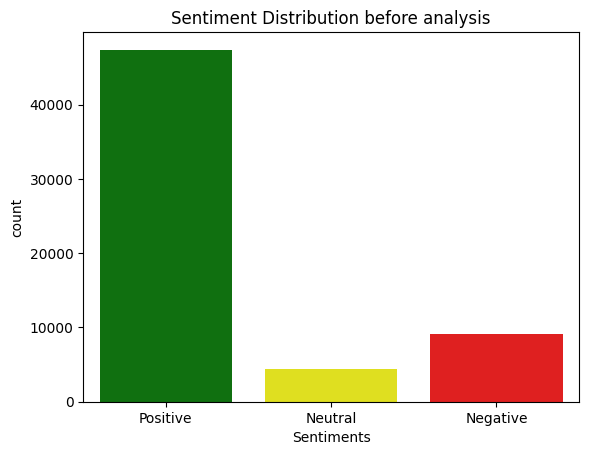

In [ ]:
#Analysing the review sentiments from the datasets
data_sentiment_count=df['Own_Rating'].value_counts()
print(data_sentiment_count)

sns.countplot(x='Own_Rating',data=df,palette=['green','yellow','red'])
plt.title('Sentiment Distribution before analysis')
plt.xlabel('Sentiments')
plt.show()

Positive    47138
neutral      6935
Negative     6787
Name: Sentiment, dtype: int64


<ipython-input-10-1efbcf3922a6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment',data=data1,palette=['green','yellow','red'])


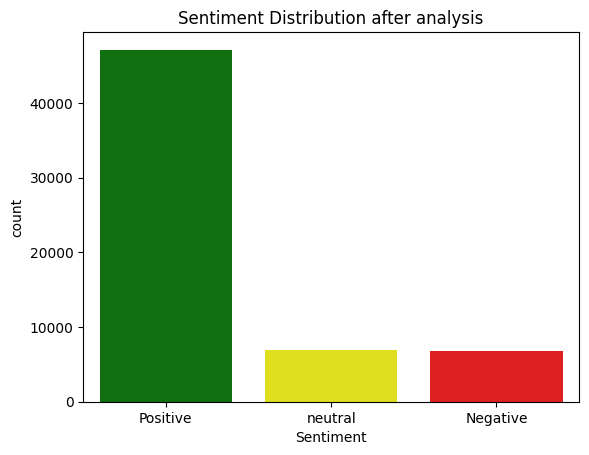

In [ ]:
#Sentimental analysis using TextBlob and classify sentiments
from textblob import TextBlob

#Take the dataset in different variable
data1=df
def get_sentiment(text):
  analysis=TextBlob(text)
  if analysis.sentiment.polarity>0:
    return 'Positive'
  elif analysis.sentiment.polarity==0:
    return 'neutral'
  else:
    return 'Negative'

#Creating anew column sentiment to store the sentiments
data1['Sentiment']=data1['Review_text'].apply(get_sentiment)

#Count the sentiments
sentiment_counts=data1['Sentiment'].value_counts()
print(sentiment_counts)

#PLotting the sentiment distribution
sns.countplot(x='Sentiment',data=data1,palette=['green','yellow','red'])
plt.title('Sentiment Distribution after analysis')
plt.xlabel('Sentiment')
plt.show()

In [ ]:
#Sentiment analysis using NLTX Vader and classify sentiments based on their product category
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#take the dataset on different variable
data2=df

sid=SentimentIntensityAnalyzer()
data2['Sentiment Score']=data2['Review_text'].apply(lambda text: sid.polarity_scores(text)['compound'])

#Map sentiment scores to categories
def get_sentiment_category(score):
  if score>=0.05:
    return 'Positive'
  elif score<=-0.05:
    return 'Negative'
  else:
    return 'Neutral'

data2['Sentiment Category']=data2['Sentiment Score'].apply(get_sentiment_category)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive    44830
Negative     9563
Neutral      6467
Name: Sentiment Category, dtype: int64

Sentiment Category  Negative  Neutral  Positive
Category                                       
books                    244      587      3077
mobile                  3794     2356     16593
mobile accessories      2682     1463     10665
refrigerator             583      459      3744
smartTv                 2260     1602     10751



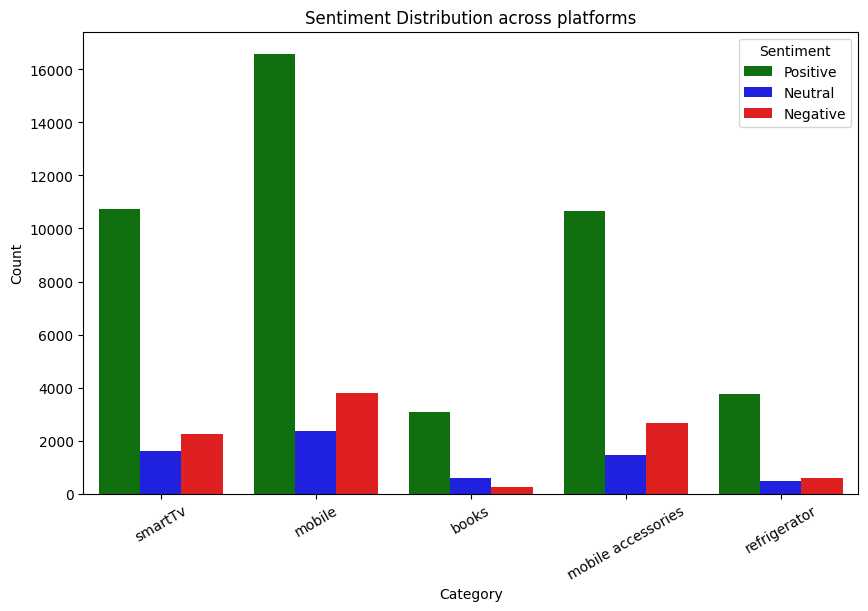

In [ ]:
#Count the sentiments
sentiment_counts=data2['Sentiment Category'].value_counts()
print(sentiment_counts)
print()

sentiment_by_category=pd.crosstab(index=data2['Category'],columns=data2['Sentiment Category'])
print(sentiment_by_category)
print()

#Visualize sentiment distribution across categories
plt.figure(figsize=(10,6))
sns.countplot(x='Category',hue='Sentiment Category',data=data2,palette=['green','blue','red'])
plt.title('Sentiment Distribution across platforms')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.legend(title='Sentiment')
plt.show()

**WORD CLOUD**

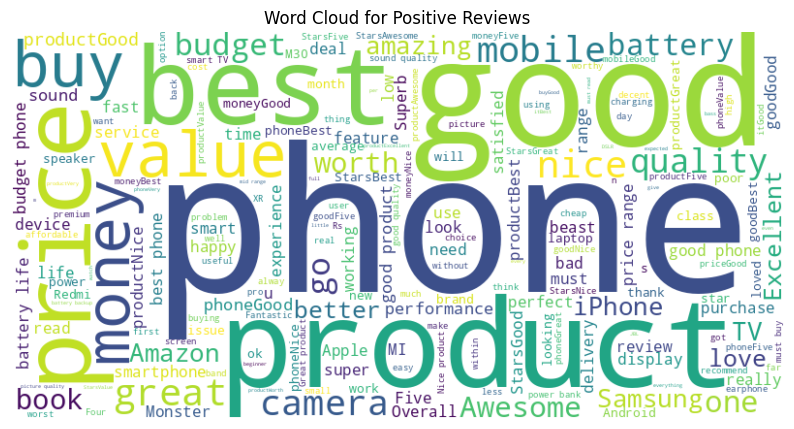

In [ ]:
#create word clouds based on the sentiments using the data2 dataset

from wordcloud import WordCloud

#Converting 'review' columnto strings
df['Review_Header']=df['Review_Header'].astype(str)

positive_reviews=''.join(data2[data2['Sentiment Category']=='Positive']['Review_Header'])
negative_reviews=''.join(data2[data2['Sentiment Category']=='Negative']['Review_Header'])
neutral_reviews=''.join(data2[data2['Sentiment Category']=='Neutral']['Review_Header'])

plt.figure(figsize=(10,8))
wordcloud_positive=WordCloud(width=800,height=400,background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

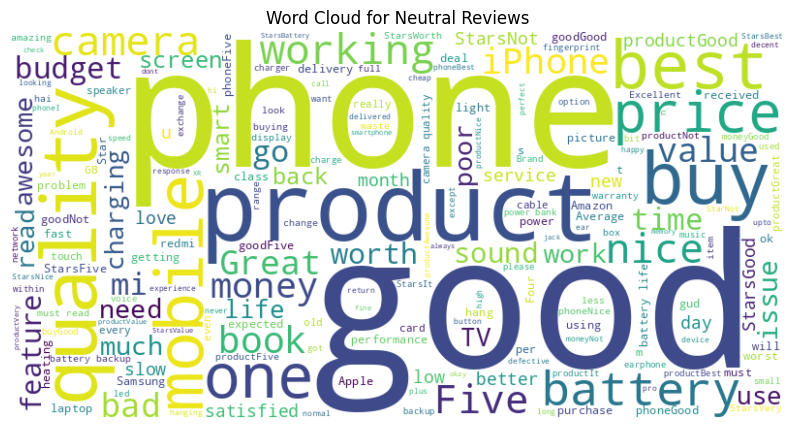

In [ ]:
plt.figure(figsize=(10,8))
wordcloud_neutral=WordCloud(width=800,height=400,background_color='white').generate(neutral_reviews)
plt.imshow(wordcloud_neutral,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews')
plt.show()

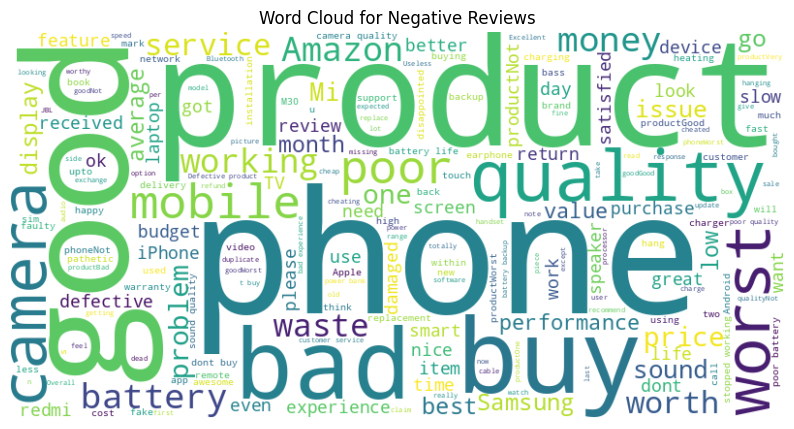

In [ ]:
plt.figure(figsize=(10,8))
wordcloud_negative=WordCloud(width=800,height=400,background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

**INFERENCE**: The Word Cloud gives us a gist of trending keywords according to the respective sentiment


ADDITIONAL ANALYSIS

<ipython-input-20-84940d2c3b8a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_counts,y=words,palette='inferno')


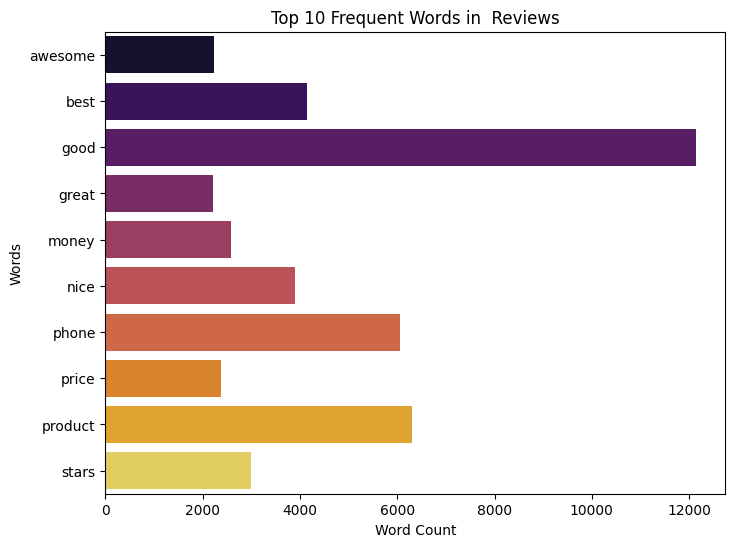

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(stop_words='english',max_features=10)
word_frequency=vectorizer.fit_transform(data2['Review_Header'])
words=vectorizer.get_feature_names_out()
word_counts=word_frequency.sum(axis=0).A1

plt.figure(figsize=(8,6))
sns.barplot(x=word_counts,y=words,palette='inferno')
plt.title('Top 10 Frequent Words in  Reviews')
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.show()

<ipython-input-21-40f3b8da6788>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index,y=top_ratings.values,palette='magma')


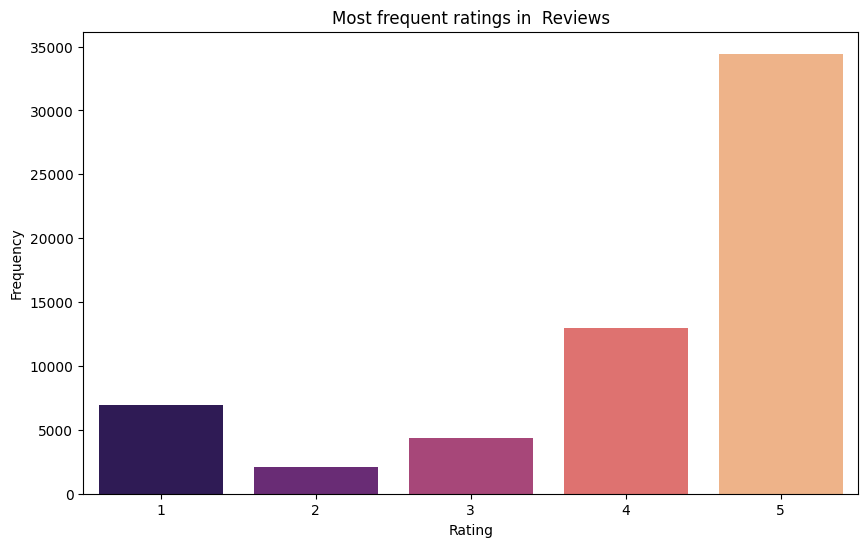

In [ ]:
top_ratings=df['Rating'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=top_ratings.index,y=top_ratings.values,palette='magma')
plt.title('Most frequent ratings in  Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from collections import Counter
# get the most common words in positive sentiments
positive_df=data2[data2['Sentiment Category']=='Positive']

top_positive=Counter([word for sentence in positive_df['Review_text'] for word in sentence.split()
])
top_positive=pd.DataFrame(top_positive.most_common(20))
top_positive=top_positive.iloc[1:,:]
top_positive.columns=['Common_words','count']

top_positive.style.background_gradient(cmap='Greens')

,Common_words,count
1,the,31589
2,and,27792
3,to,20249
4,for,18531
5,a,18218
6,I,16785
7,this,15458
8,in,15250
9,it,14888
10,good,14622


In [ ]:
# get the most common words in negative sentiments
negative_df=data2[data2['Sentiment Category']=='Negative']

top_negative=Counter([word for sentence in negative_df['Review_text'] for word in sentence.split()
])
top_negative=pd.DataFrame(top_negative.most_common(20))
top_negative=top_negative.iloc[1:,:]
top_negative.columns=['Common_words','count']

top_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,the,6815
2,and,5247
3,not,5211
4,to,4950
5,I,4407
6,of,3334
7,it,3315
8,a,3290
9,this,3283
10,in,2926


In [ ]:
# get the most common words in neutral sentiments
neutral_df=data2[data2['Sentiment Category']=='Neutral']

top_neutral=Counter([word for sentence in negative_df['Review_text'] for word in sentence.split()
])
top_neutral=pd.DataFrame(top_neutral.most_common(20))
top_neutral=top_neutral.iloc[1:,:]
top_neutral.columns=['Common_words','count']

top_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
1,the,6815
2,and,5247
3,not,5211
4,to,4950
5,I,4407
6,of,3334
7,it,3315
8,a,3290
9,this,3283
10,in,2926
